Generating synthetic dataset...


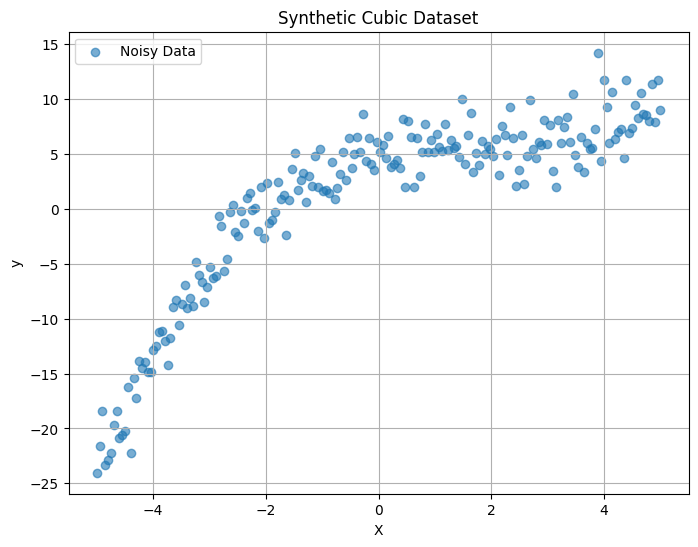

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import Dense, ReLU, MeanSquaredError, SGD

print("Generating synthetic dataset...")

def generate_data(n_samples=200):
    X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
    y_true = 0.1 * (X**3) - 0.5 * (X**2) + X + 5
    noise = np.random.normal(0, 2, (n_samples, 1))
    y = y_true + noise
    return X, y

X_train, y_train = generate_data()

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, alpha=0.6, label='Noisy Data')
plt.title('Synthetic Cubic Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
print("Defining the model architecture...")

input_size = 1
hidden_size = 64
output_size = 1

layer1 = Dense(input_size, hidden_size)
activation1 = ReLU()
layer2 = Dense(hidden_size, output_size)

network = [layer1, activation1, layer2]
loss_function = MeanSquaredError()
optimizer = SGD(layers=[layer1, layer2], learning_rate=0.001)

Defining the model architecture...


In [3]:
print("Starting training...")

epochs = 2000
batch_size = 32
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0
    permutation = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[permutation]
    y_shuffled = y_train[permutation]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        out1 = layer1.forward(X_batch)
        act1 = activation1.forward(out1)
        y_pred = layer2.forward(act1)
        loss = loss_function.forward(y_pred, y_batch)
        epoch_loss += loss
        grad = loss_function.backward(y_pred, y_batch)
        grad = layer2.backward(grad)
        grad = activation1.backward(grad)
        grad = layer1.backward(grad)
        optimizer.step()

    avg_epoch_loss = epoch_loss / (X_train.shape[0] / batch_size)
    loss_history.append(avg_epoch_loss)
    if (epoch + 1) % 200 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}')

print("Training finished.")

Starting training...
Epoch 200/2000, Loss: 6.5007
Epoch 400/2000, Loss: 6.1708
Epoch 600/2000, Loss: 5.0648
Epoch 800/2000, Loss: 4.6817
Epoch 1000/2000, Loss: 4.2550
Epoch 1200/2000, Loss: 4.1965
Epoch 1400/2000, Loss: 4.5861
Epoch 1600/2000, Loss: 3.9252
Epoch 1800/2000, Loss: 4.0899
Epoch 2000/2000, Loss: 4.3412
Training finished.


Visualizing results...


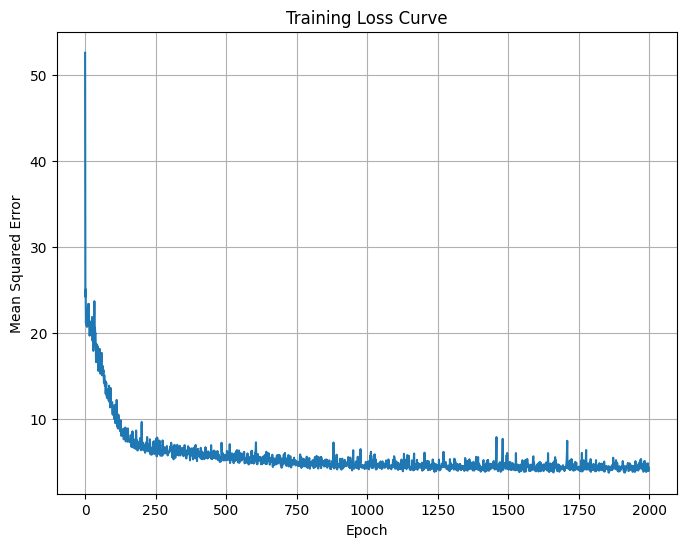

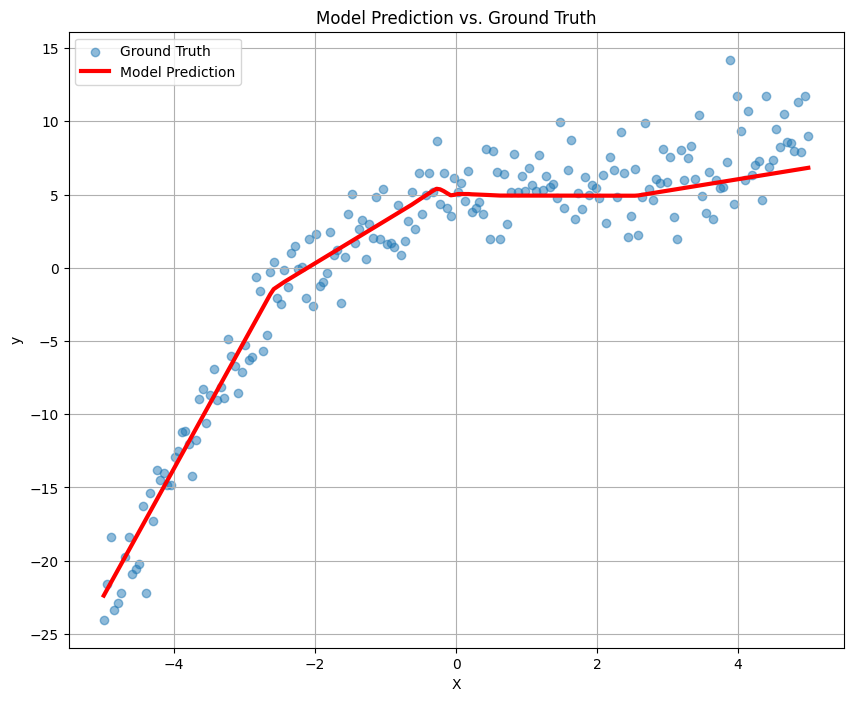

In [4]:
print("Visualizing results...")

plt.figure(figsize=(8, 6))
plt.plot(loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

out1 = layer1.forward(X_train)
act1 = activation1.forward(out1)
y_final_pred = layer2.forward(act1)

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, alpha=0.5, label='Ground Truth')
sorted_indices = np.argsort(X_train.flatten())
plt.plot(X_train[sorted_indices], y_final_pred[sorted_indices], color='red', linewidth=3, label='Model Prediction')
plt.title('Model Prediction vs. Ground Truth')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()